In [23]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [24]:
#  Read data

df = pd.read_excel('../data/row/Footballers_questionnaire.xlsx')
df.head()

,Unnamed: 0,ID,Questions,Option,Rank,Question-Group,Main_Topic,Sub_Topic
0,0,101,A1. Gender?,Female,NaN,A,Peace,General
1,1,101,A2. Primary language? (If there are multiple l...,"Lury, Turkish, Peersian",NaN,A,Peace,General
2,2,101,A3. In what year were you born?,1999,NaN,A,Women,unrelated
3,3,101,A4. Where do you live?,"City, Zanjan",NaN,A,Peace,General
4,4,101,A5. Are you employed?,Yes,NaN,A,Women,Women's Empowerment


In [25]:
# remove unrelated topics from Main_Topic

df = df[df['Main_Topic'] != 'unrelated']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1709 entries, 0 to 1732
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1709 non-null   int64  
 1   ID              1709 non-null   int64  
 2   Questions       1709 non-null   object 
 3   Option          1680 non-null   object 
 4   Rank            842 non-null    float64
 5   Question-Group  1709 non-null   object 
 6   Main_Topic      1709 non-null   object 
 7   Sub_Topic       1709 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 120.2+ KB


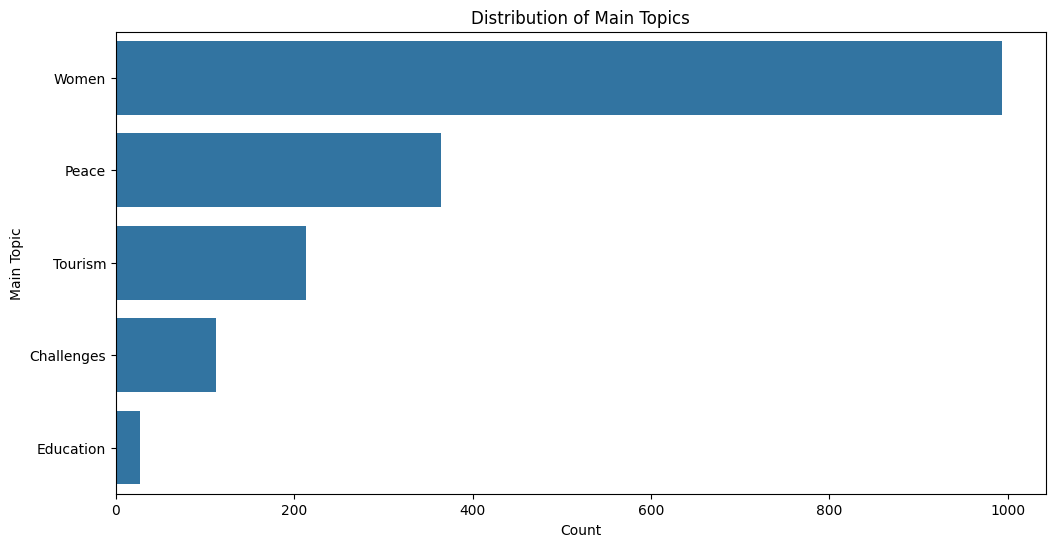

In [27]:
# Distributing topics in columns Main_Topic

plt.figure(figsize=(12, 6))
sns.countplot(y='Main_Topic', data=df, order=df['Main_Topic'].value_counts().index)
plt.title('Distribution of Main Topics')
plt.xlabel('Count')
plt.ylabel('Main Topic')
plt.show()

In [28]:
# calculate percent of missing value
# Rank column have missing value because Rank isnot defined for Question_Group = A

percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing = np.round(percent_missing , decimals=2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.00
ID,ID,0.00
Questions,Questions,0.00
Option,Option,1.70
Rank,Rank,50.73
Question-Group,Question-Group,0.00
Main_Topic,Main_Topic,0.00
Sub_Topic,Sub_Topic,0.00


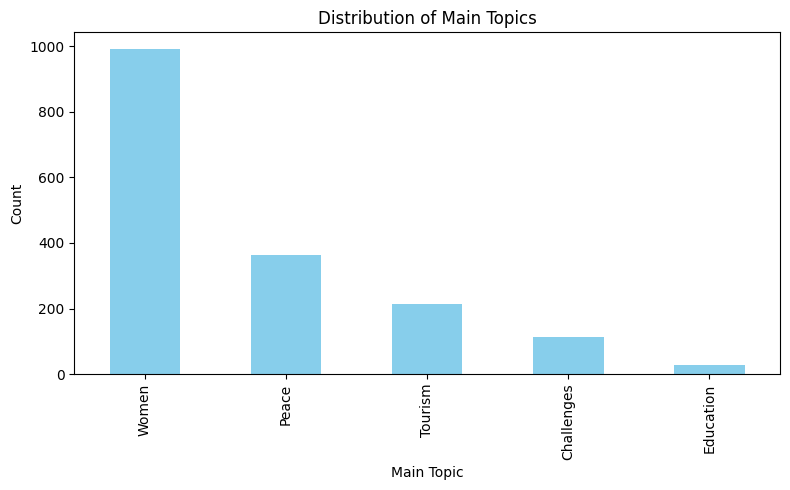

In [29]:
# Count the number of data points in each subject.
main_topic_counts = df['Main_Topic'].value_counts()

# Draw a bar chart to show the number of data points for each main topic 
plt.figure(figsize=(8, 5))
main_topic_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Main Topics')
plt.xlabel('Main Topic')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

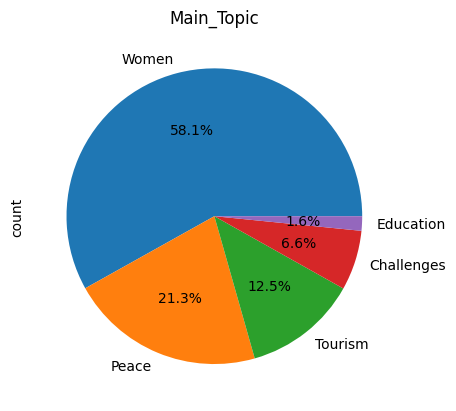

In [30]:
ax = df["Main_Topic"].value_counts().plot(kind="pie", title="Main_Topic" , autopct='%1.1f%%',)

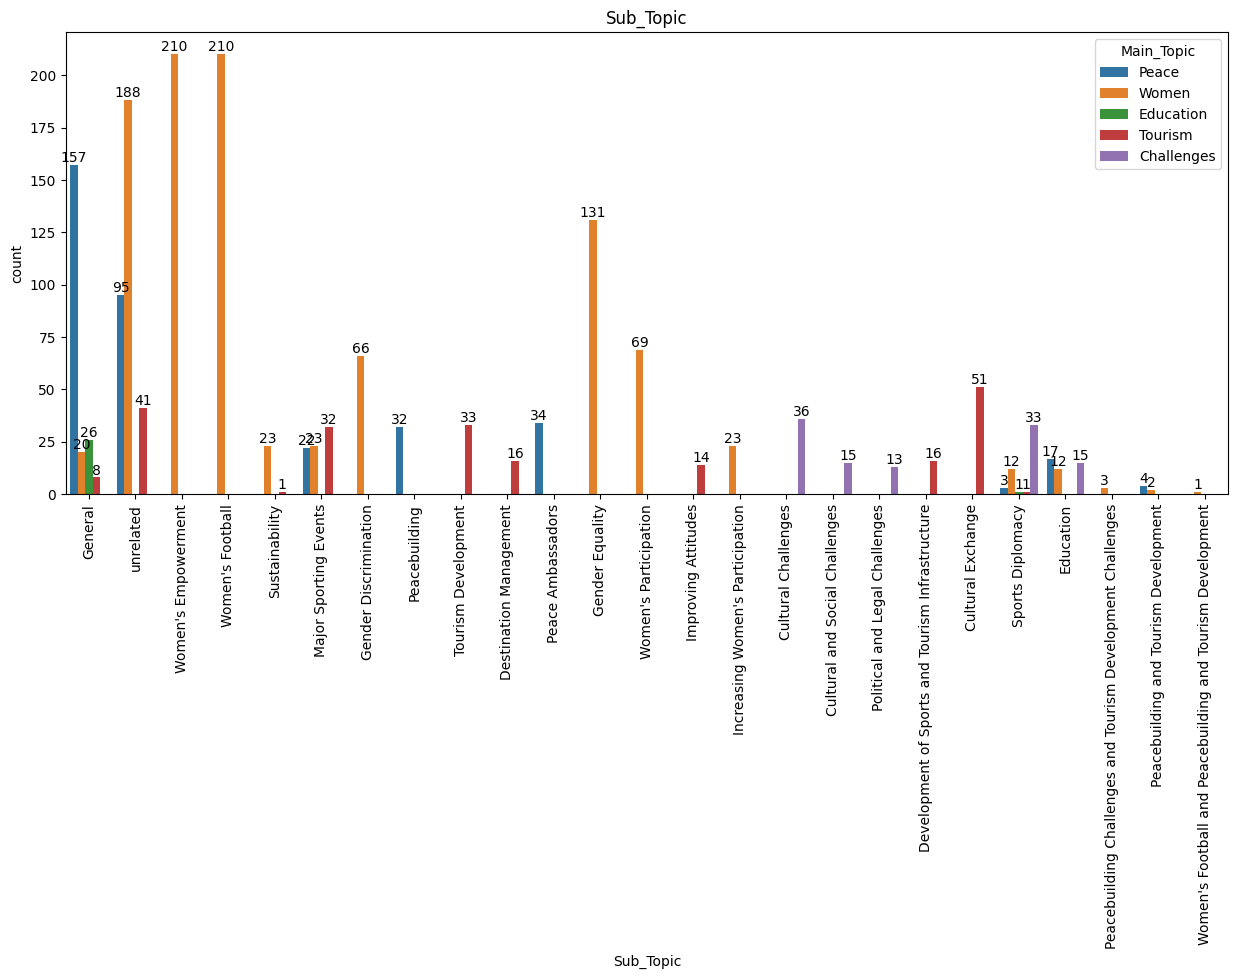

In [31]:
plt.figure(figsize=(15,6))
ax =  sns.countplot( x = 'Sub_Topic' ,data=df , hue='Main_Topic')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Sub_Topic")
for container in ax.containers:
    ax.bar_label(container)


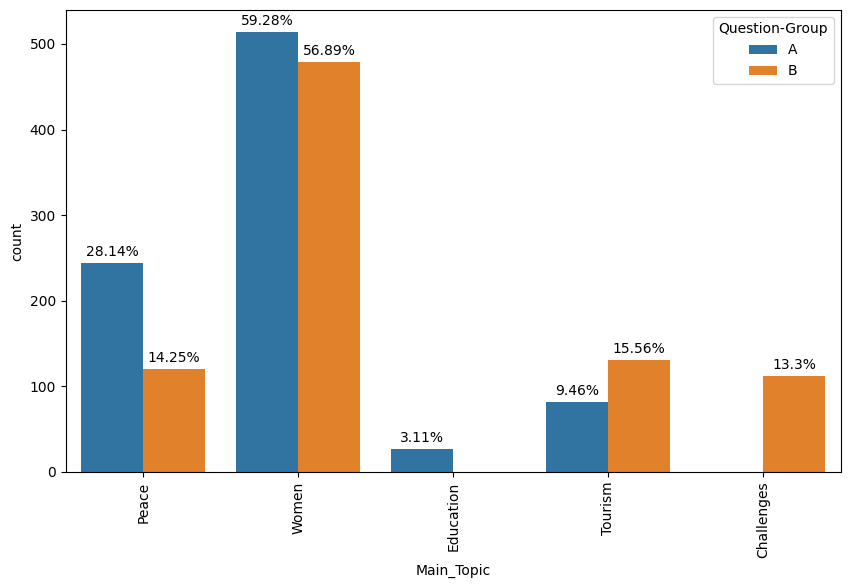

In [32]:

plt.figure(figsize=(10,6))
ax =  sns.countplot( x = 'Main_Topic' ,data=df , hue='Question-Group')
totals = []
for container in ax.containers:
    total = 0
    for bar in container:
        total += bar.get_height()
    totals.append(total)

# Add value labels as percentages inside the bar
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        ax.annotate(str(round(bar.get_height()/totals[i]*100, 2)) + '%', 
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
ax.tick_params(axis='x', rotation=90)


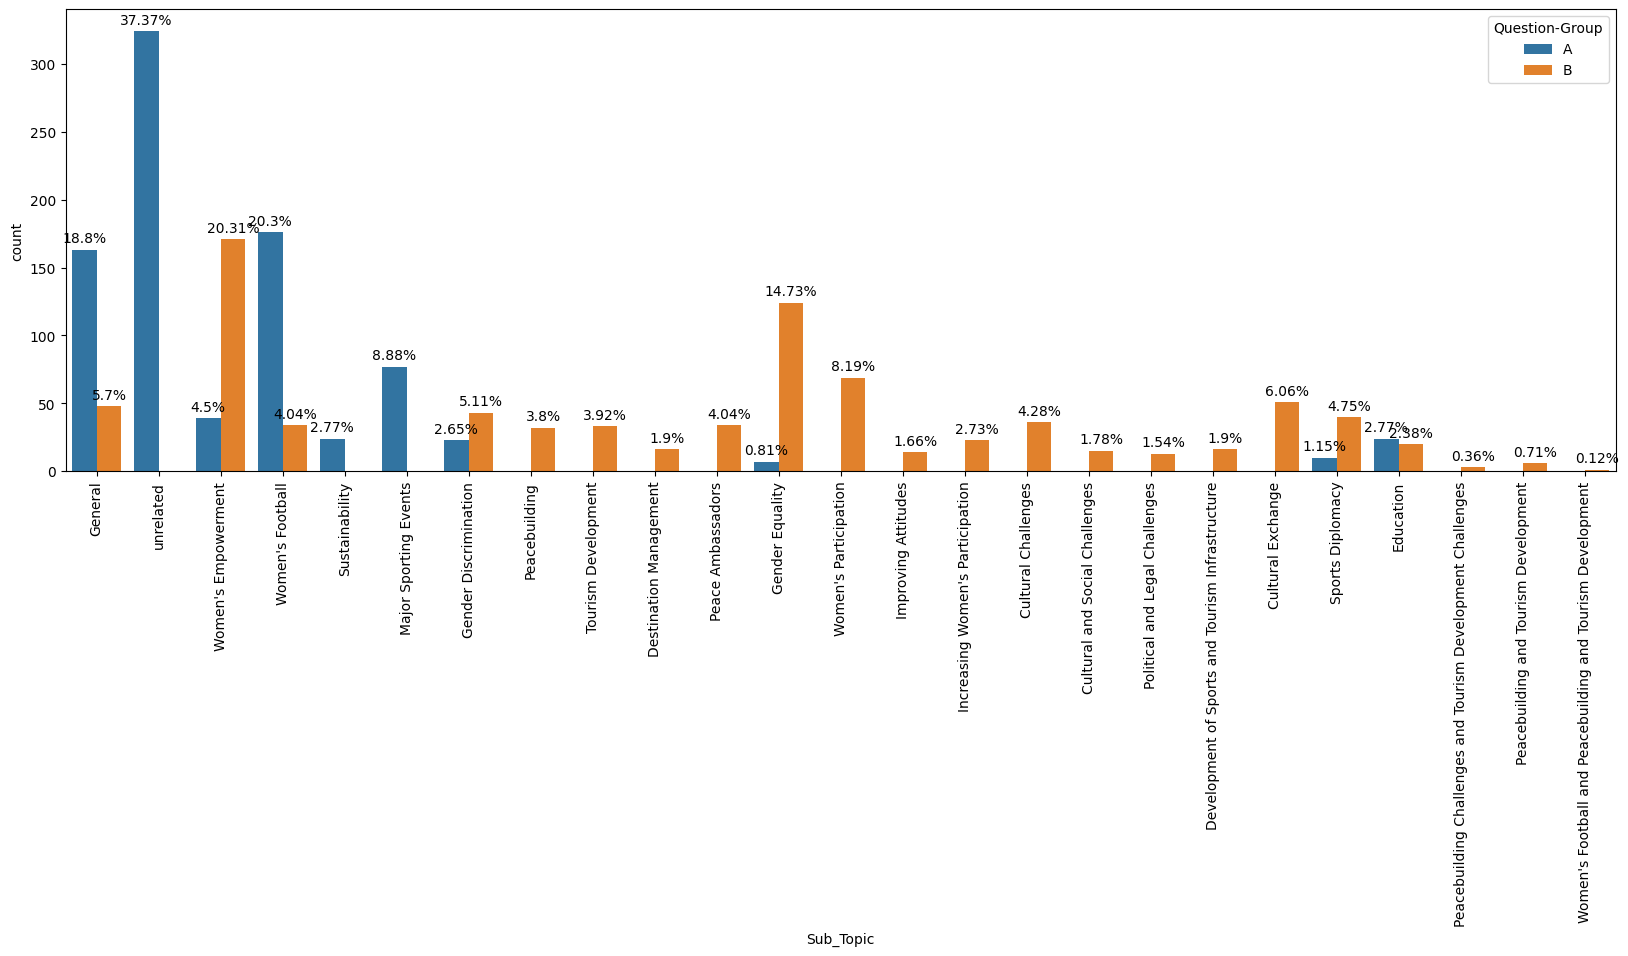

In [33]:
plt.figure(figsize=(20,6))
ax =  sns.countplot( x = 'Sub_Topic' ,data=df , hue='Question-Group')
totals = []
for container in ax.containers:
    total = 0
    for bar in container:
        total += bar.get_height()
    totals.append(total)

# Add value labels as percentages inside the bar
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        ax.annotate(str(round(bar.get_height()/totals[i]*100, 2)) + '%', 
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
ax.tick_params(axis='x', rotation=90)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1709 entries, 0 to 1732
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1709 non-null   int64  
 1   ID              1709 non-null   int64  
 2   Questions       1709 non-null   object 
 3   Option          1680 non-null   object 
 4   Rank            842 non-null    float64
 5   Question-Group  1709 non-null   object 
 6   Main_Topic      1709 non-null   object 
 7   Sub_Topic       1709 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 120.2+ KB


In [35]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [36]:
df  = df[ df[ "Questions"].str.contains("A3. In what year were you born?" )==False ]

In [37]:
df  = df[ df[ "Questions"].str.contains("A2. Primary language?" )==False ]

In [38]:
df  = df[ df[ "Questions"].str.contains("A4. Where do you live?" )==False ]

In [39]:
df

,ID,Questions,Option,Rank,Question-Group,Main_Topic,Sub_Topic
0,101,A1. Gender?,Female,NaN,A,Peace,General
4,101,A5. Are you employed?,Yes,NaN,A,Women,Women's Empowerment
5,101,A6. Is your job related to football? (Please c...,Yes,NaN,A,Women,Women's Football
6,101,A7. Indicate your highest level of education. ...,Master,NaN,A,Education,General
7,101,A8. Type of institution you work for.,Governmental,NaN,A,Women,Women's Empowerment
...,...,...,...,...,...,...,...
1728,127,B5. What strategies can be implemented to ensu...,Providing infrastructure,1.0,B,Tourism,Development of Sports and Tourism Infrastructure
1729,127,B6. What role can the government and other sta...,Promoting cultural exchange,1.0,B,Tourism,Cultural Exchange
1730,127,B7. How can female football players be empower...,Recognizing their achievements,1.0,B,Women,Women's Empowerment
1731,127,B8. What is the overall impact of promoting pe...,Improving relationships between different groups,1.0,B,Tourism,Cultural Exchange


## <font color="red">! Attention
### <font color="#0010A0"> Group A questions do not have a value for the rank column.
### <font color="#0010A0"> For better processing and communication with the questions in B group, it should have a rank.
### <font color="#0010A0"> Here, we consider the values of the yes options to be 1 and replace the value of 0 for other values.
<br>

In [40]:
# Ensure values are converted to strings for the Option column

df['Option'] = df['Option'].astype(str)


# Preprocessing for group A questions
# If Yes then Rank = 1 and if No then Rank = 0
# This is done for group A questions which have no priority

df.loc[(df['Question-Group'] == 'A') & (df['Option'].str.lower() == 'yes'), 'Rank'] = 1
df.loc[(df['Question-Group'] == 'A') & (df['Option'].str.lower() == 'no'), 'Rank'] = 0


# If the value is empty, convert it to 0 (only for group A)

df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce').fillna(0).astype(int)

In [41]:
df

,ID,Questions,Option,Rank,Question-Group,Main_Topic,Sub_Topic
0,101,A1. Gender?,Female,0,A,Peace,General
4,101,A5. Are you employed?,Yes,1,A,Women,Women's Empowerment
5,101,A6. Is your job related to football? (Please c...,Yes,1,A,Women,Women's Football
6,101,A7. Indicate your highest level of education. ...,Master,0,A,Education,General
7,101,A8. Type of institution you work for.,Governmental,0,A,Women,Women's Empowerment
...,...,...,...,...,...,...,...
1728,127,B5. What strategies can be implemented to ensu...,Providing infrastructure,1,B,Tourism,Development of Sports and Tourism Infrastructure
1729,127,B6. What role can the government and other sta...,Promoting cultural exchange,1,B,Tourism,Cultural Exchange
1730,127,B7. How can female football players be empower...,Recognizing their achievements,1,B,Women,Women's Empowerment
1731,127,B8. What is the overall impact of promoting pe...,Improving relationships between different groups,1,B,Tourism,Cultural Exchange


In [42]:
# Checking the results after preprocessing

print("\nProcessed Data:")
print(df.head())


Processed Data:
    ID                                          Questions        Option  Rank  \
0  101                                        A1. Gender?        Female     0   
4  101                              A5. Are you employed?           Yes     1   
5  101  A6. Is your job related to football? (Please c...           Yes     1   
6  101  A7. Indicate your highest level of education. ...        Master     0   
7  101              A8. Type of institution you work for.  Governmental     0   

  Question-Group Main_Topic            Sub_Topic  
0              A      Peace              General  
4              A      Women  Women's Empowerment  
5              A      Women     Women's Football  
6              A  Education              General  
7              A      Women  Women's Empowerment  


In [43]:
# Save the preprocessed file

output_path = '../data/processed/Footballers_questionnaire.xlsx'
df.to_excel(output_path, index=False)
print(f"Preprocessed data saved to: {output_path}")

Preprocessed data saved to: ../data/processed/Footballers_questionnaire.xlsx
